In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
155074,155074,1707,29274,What does it mean if a dog vomits white foam?,What does it mean if a dog is throwing up yell...,1
271453,271453,389534,6883,When you temporarily deactivate your Instagram...,If an instagram account is temporarily disable...,0
253774,253774,368369,368370,What will be Hillary clinton's policy towards ...,Are psychiatrists relevant?,0
26315,26315,48989,48990,Why is Decathlon not present in Mangalore?,Will Decathlon be established in Mangalore?,0
217500,217500,180291,323864,"Where does the acronym ""POTUS"" come from and w...","Why do people have first, last, and middle nam...",0
345173,345173,473462,473463,Am I eligible for EB2 Green Card processing wi...,Am i eligible for EB2 Green Card processing wi...,0
261749,261749,377949,15284,How do I earn some extra money on weekends in ...,How can I earn some extra money during weekend...,1
196532,196532,29160,17519,Is astrology real?,Is astrology real or not?,1
163321,163321,201428,254066,What are the best Cards Against Humanity expan...,Are the guys behind SnapSnapGo the same as the...,0
344484,344484,472716,342265,What was it like growing up in Japan in the 90's?,What is it like growing up in Japan?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot: >

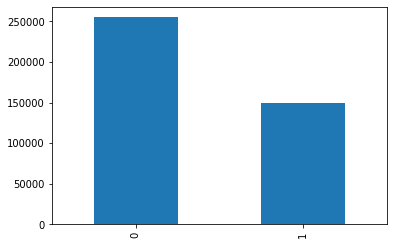

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


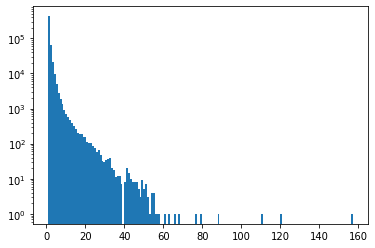

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()